In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pylab as plt

from image_analysis.read_files import get_paths, change_paths
from image_analysis.fit import plot, roi
from image_analysis.preprocess import mask

In [3]:
pixel_size = 2

In [4]:
folder_pretreated = r'/home/natalia/Documents/github_image_analysis/experimental_data/treatment_all/'
df = pd.read_excel("../filtering_image/preview/description_of_all_images_exclude_not_nice_segm.xlsx")

In [5]:
# Remove rows where the 'exclude' column is 'yes'
df = df[df['exclude'] != 'yes']

df = df.drop(columns=['exclude'])
df = df.drop(columns=['comment'])
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [6]:
df

,pretreated_file_name,hcr,animal_size,time,shh_segm,fgf_segm,dusp_segm
0,hcr11_lb27_fl,11,1.5,1,yes,yes,yes
1,hcr11_lb28_fl,11,1.5,1,yes,yes,yes
2,hcr11_lb28_fr,11,1.5,1,yes,yes,yes
3,hcr15_lb41_fl,15,1.5,1,yes,yes,yes
4,hcr16_lb44_fl,16,1.5,1,yes,yes,yes
...,...,...,...,...,...,...,...
58,hcr17_7cm_9dpa_dapi,17,7.0,9,yes,yes,yes
59,hcr21_7cm_10dpa_noif_17,21,7.0,10,yes,yes,yes
60,hcr21_7cm_10dpa_noif_16,21,7.0,10,yes,yes,no
61,hcr22_7cm_10d_t3a,22,7.0,10,yes,yes,yes


# Preview

In [7]:
set( df['animal_size'].values )

{1.5, 2.5, 5.0, 7.0}

## Limb buds

In [8]:
df_to_plot = df[df['animal_size'] == 1.5]

In [9]:
keys_dpa = set( [str(h) for h in df_to_plot['hcr'].values] )
keys_dpa

{'11', '15', '16', '17', '18', '19', '20', '21', '22', '23'}

In [10]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['hcr'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['pretreated_file_name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            if 'shh50_clip' in key:
                img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )
            elif ('fgf50_clip' in key) or ('dusp50_clip' in key):
                img_morph[key] = img_morph[key] * mask.few_largest_components( img_morph[key] > 0, 2 )

        # total projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:196: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:198: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


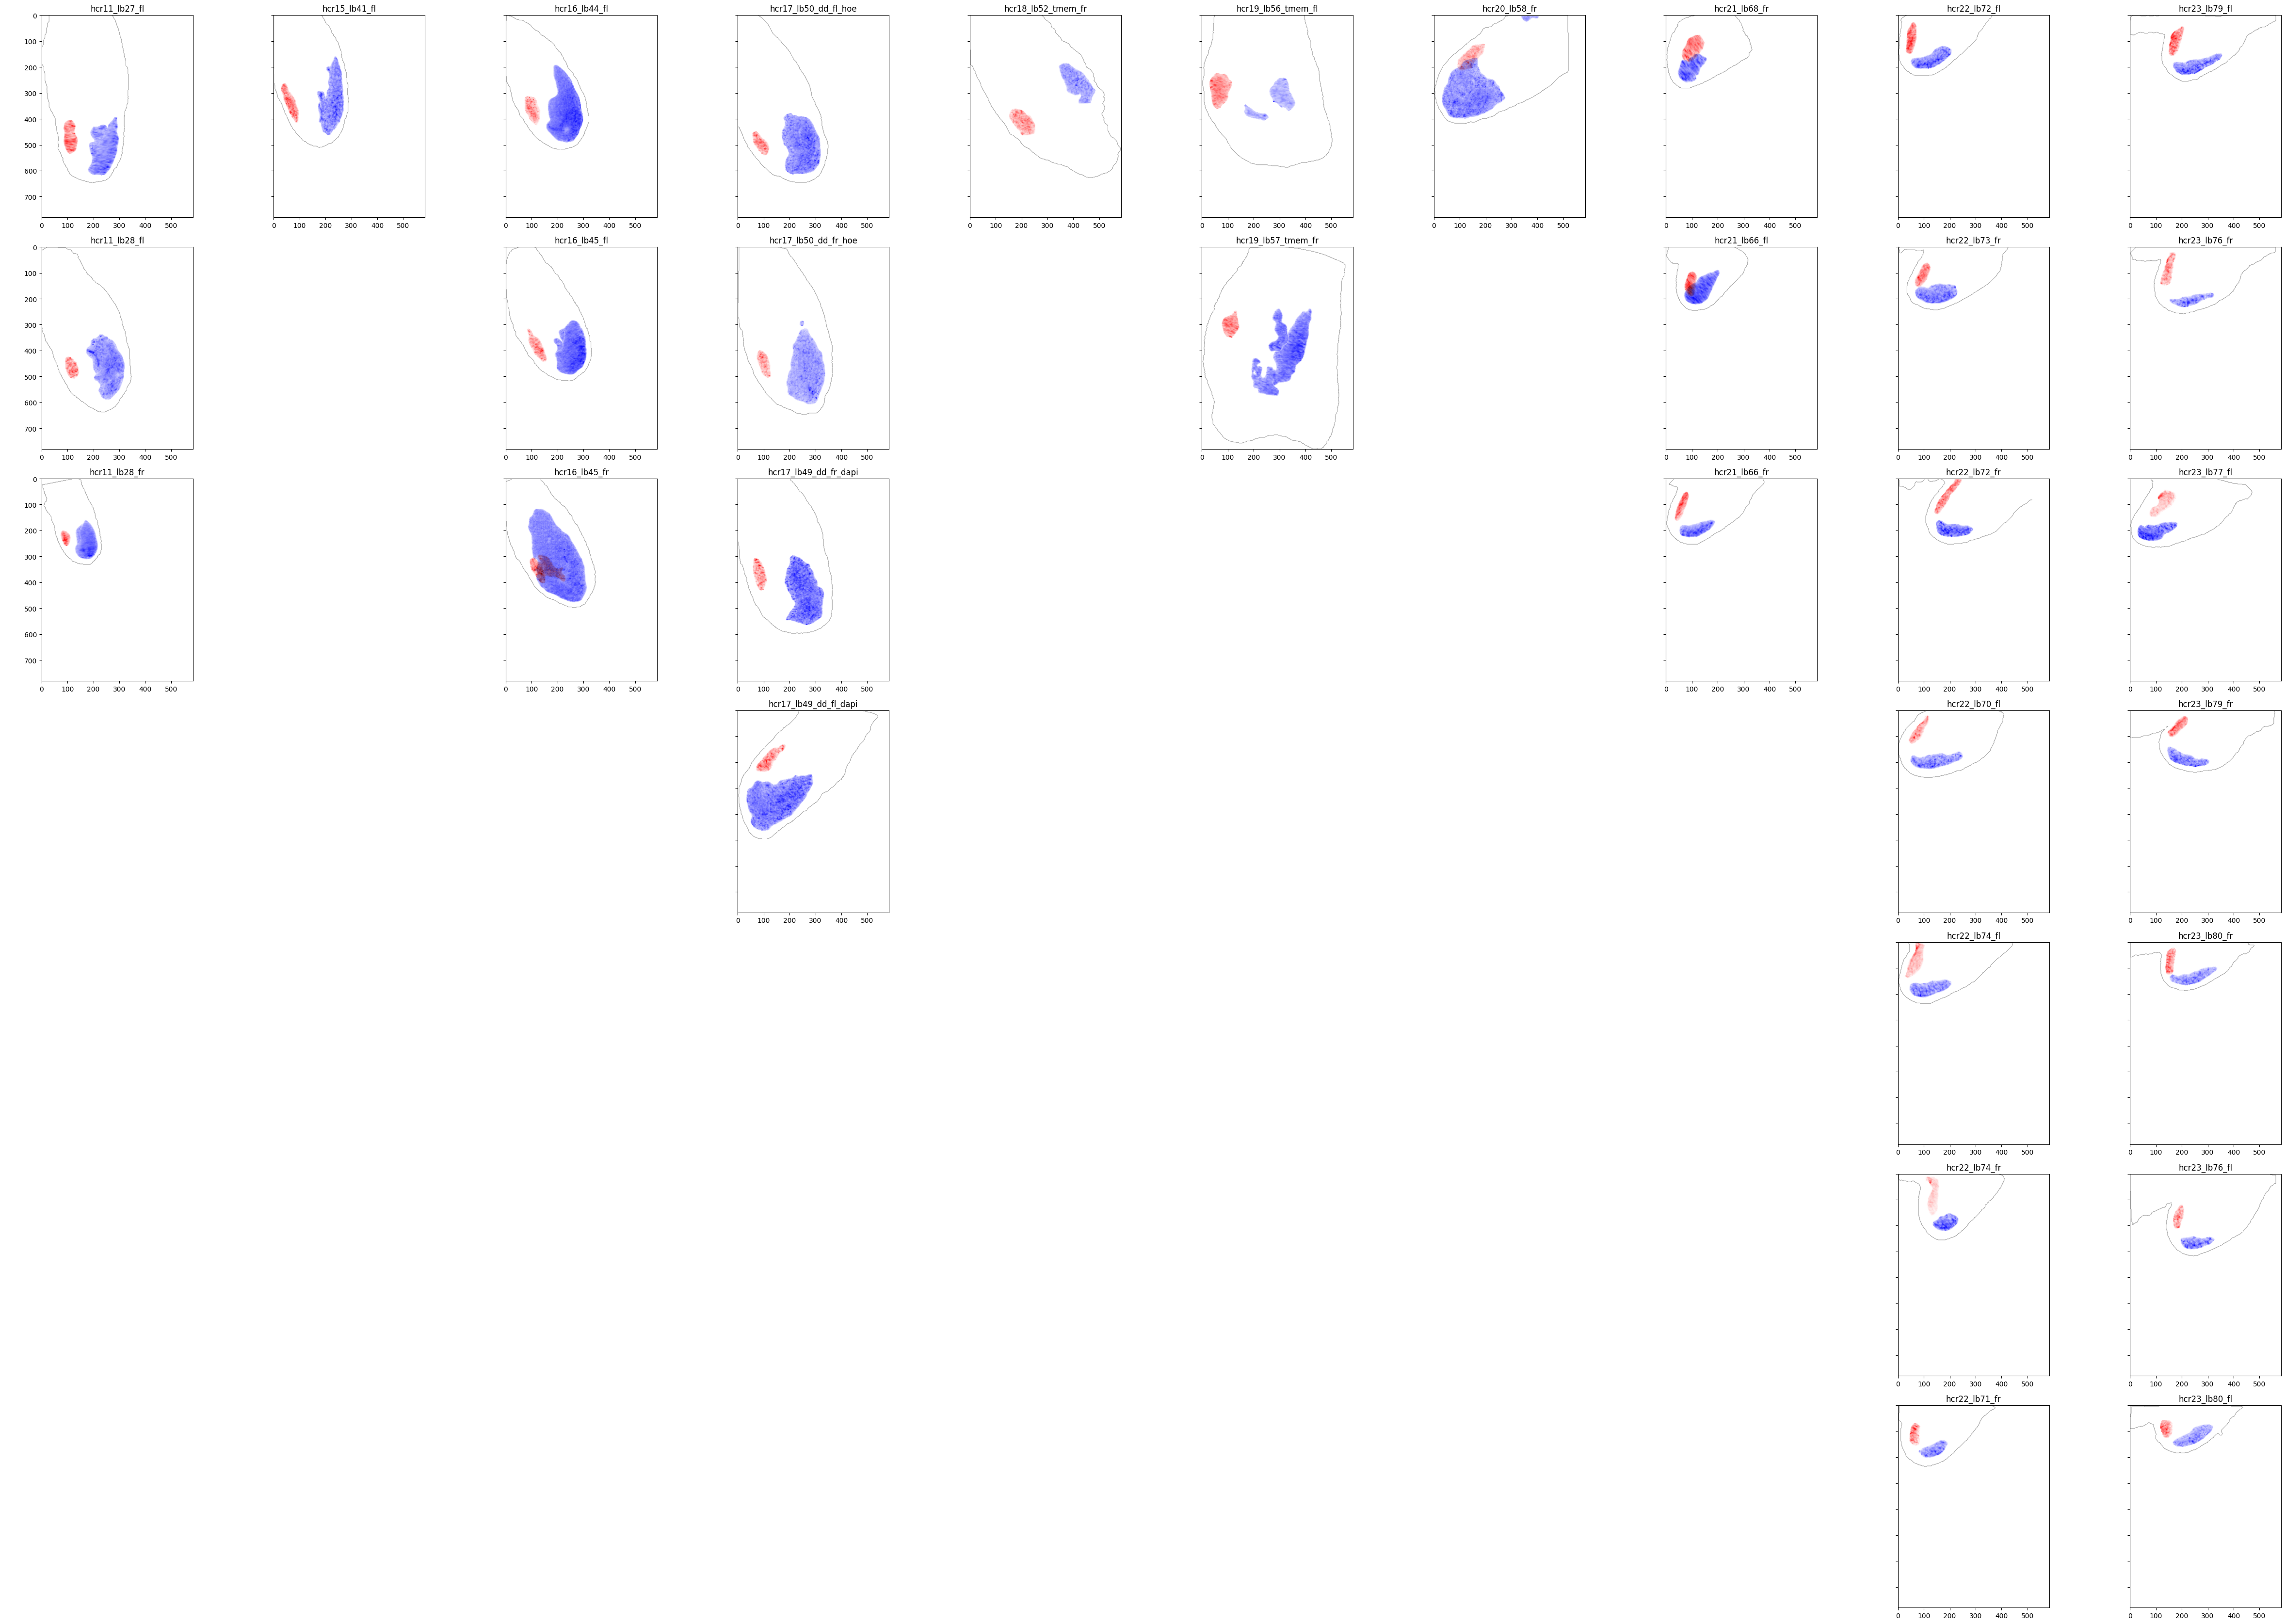

In [11]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('preview/limb_buds_left_for_final_fits.pdf')
plt.show()

## 2.5 cm blastemas

In [12]:
df_to_plot = df[df['animal_size'] == 2.5]

In [13]:
len(df_to_plot)

8

In [14]:
keys_dpa = set( [str(h) for h in df_to_plot['time'].values] )
keys_dpa

{'4', '5', '6', '7'}

In [15]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['time'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['pretreated_file_name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            if 'shh50_clip' in key:
                img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )
            elif ('fgf50_clip' in key) or ('dusp50_clip' in key):
                img_morph[key] = img_morph[key] * mask.few_largest_components( img_morph[key] > 0, 2 )
            

        # total projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:196: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:198: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


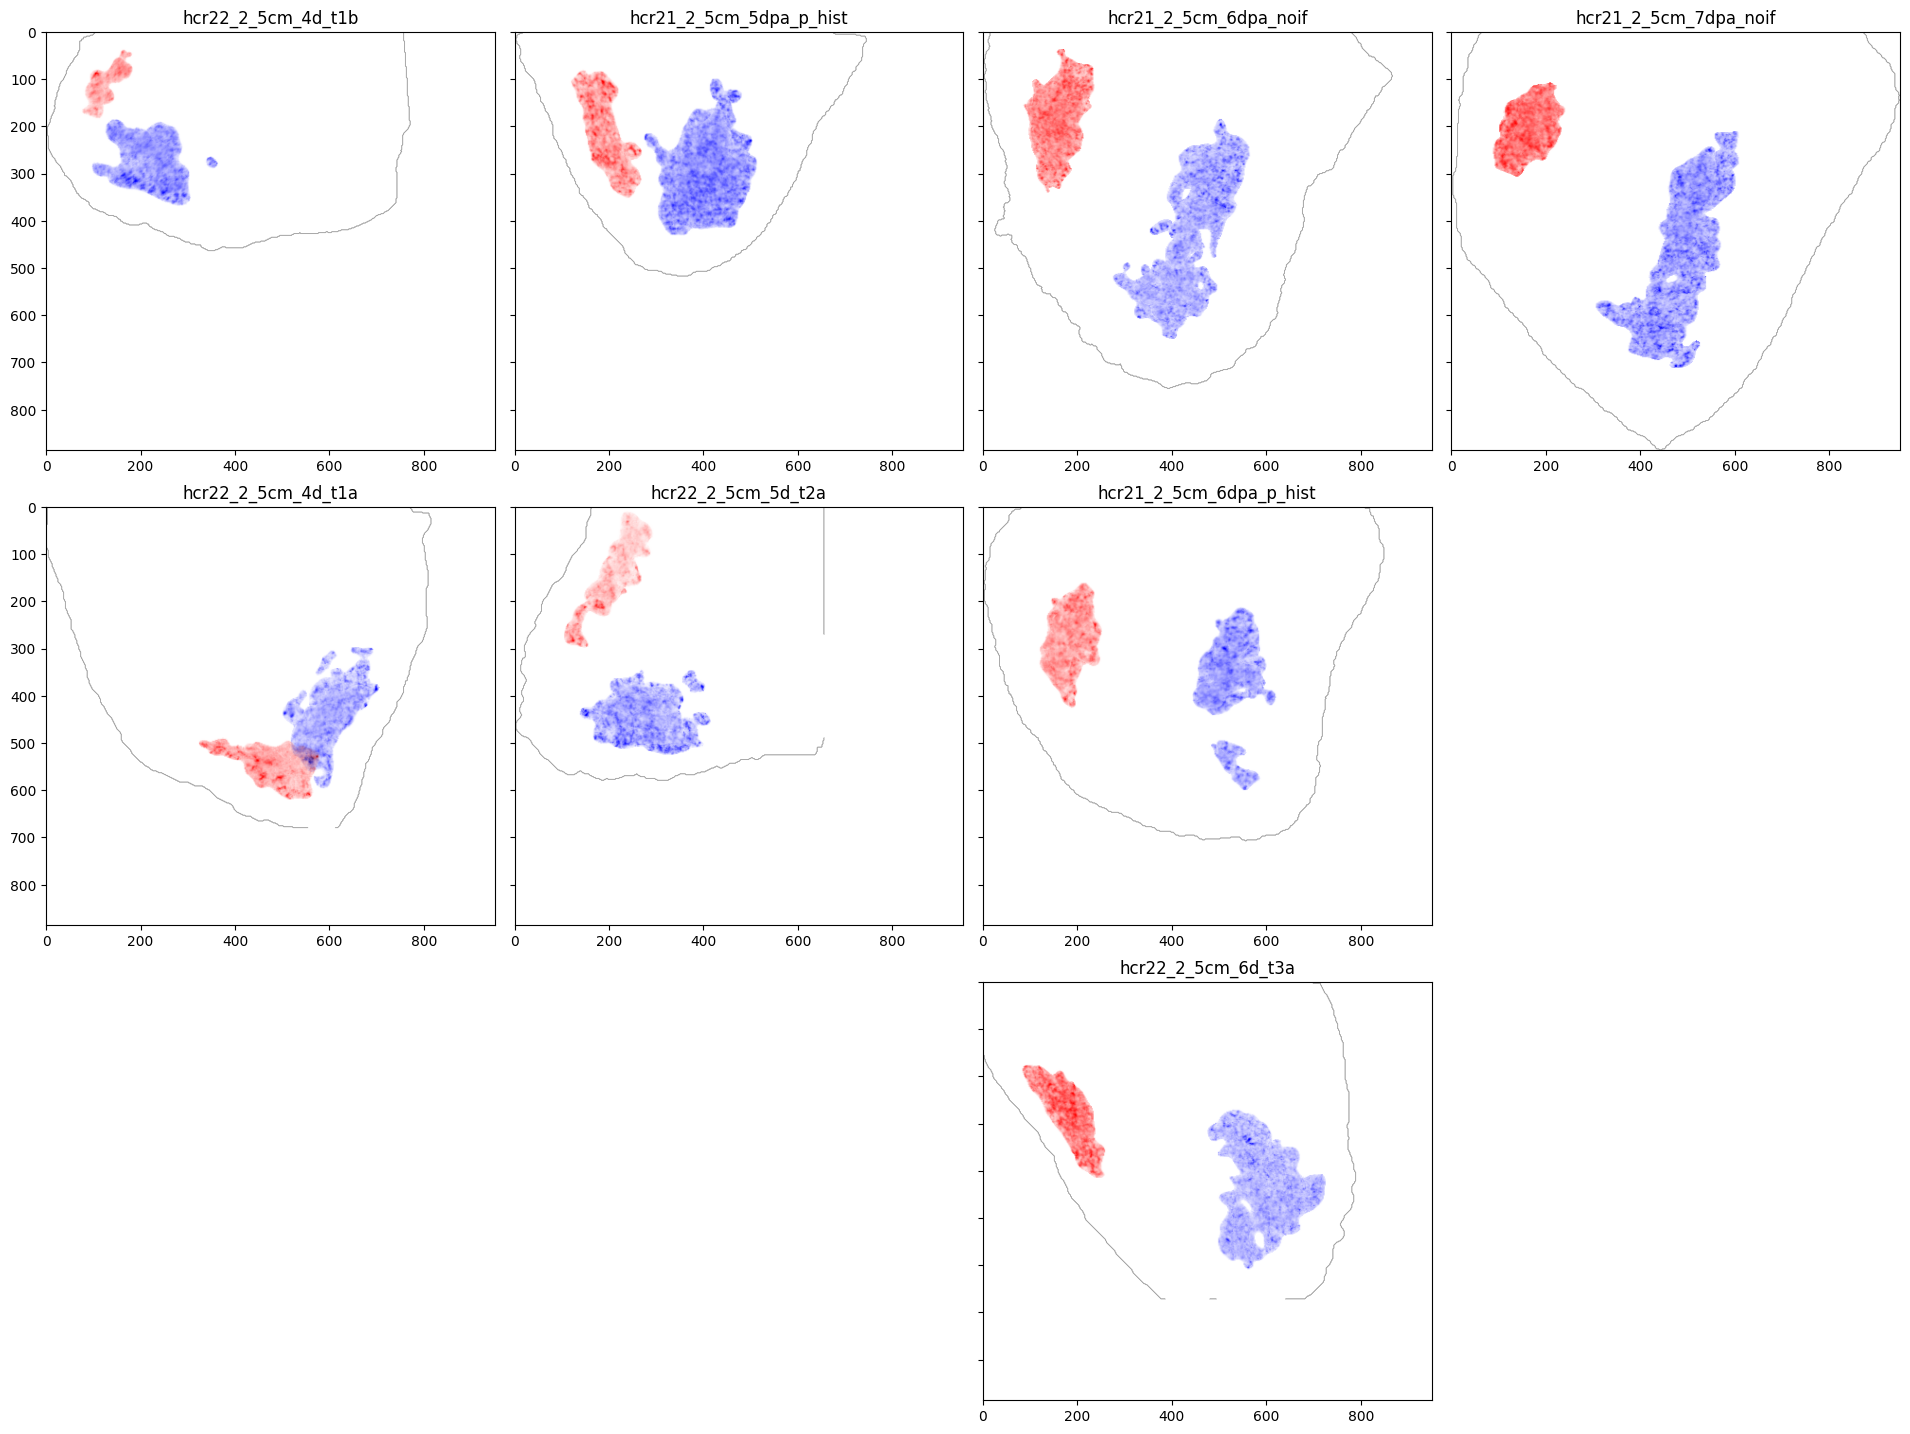

In [16]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('preview/2_5cm_blastemas_left_for_final_fits.pdf')
plt.show()

## 5 cm blastemas

In [17]:
df_to_plot = df[df['animal_size'] == 5]

In [18]:
len(df_to_plot)

15

In [19]:
keys_dpa = list( set( [str(h) for h in df_to_plot['time'].values] ) )
#keys_dpa.remove('<NA>')
keys_dpa = set(keys_dpa)
keys_dpa

{'10', '6', '7', '8', '9'}

In [20]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['time'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['pretreated_file_name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            if 'shh50_clip' in key:
                img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )
            elif ('fgf50_clip' in key) or ('dusp50_clip' in key):
                img_morph[key] = img_morph[key] * mask.few_largest_components( img_morph[key] > 0, 2 )
            

        # total projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:196: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:198: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


In [21]:
img.keys()

dict_keys(['7', '8', '9', '6', '10'])

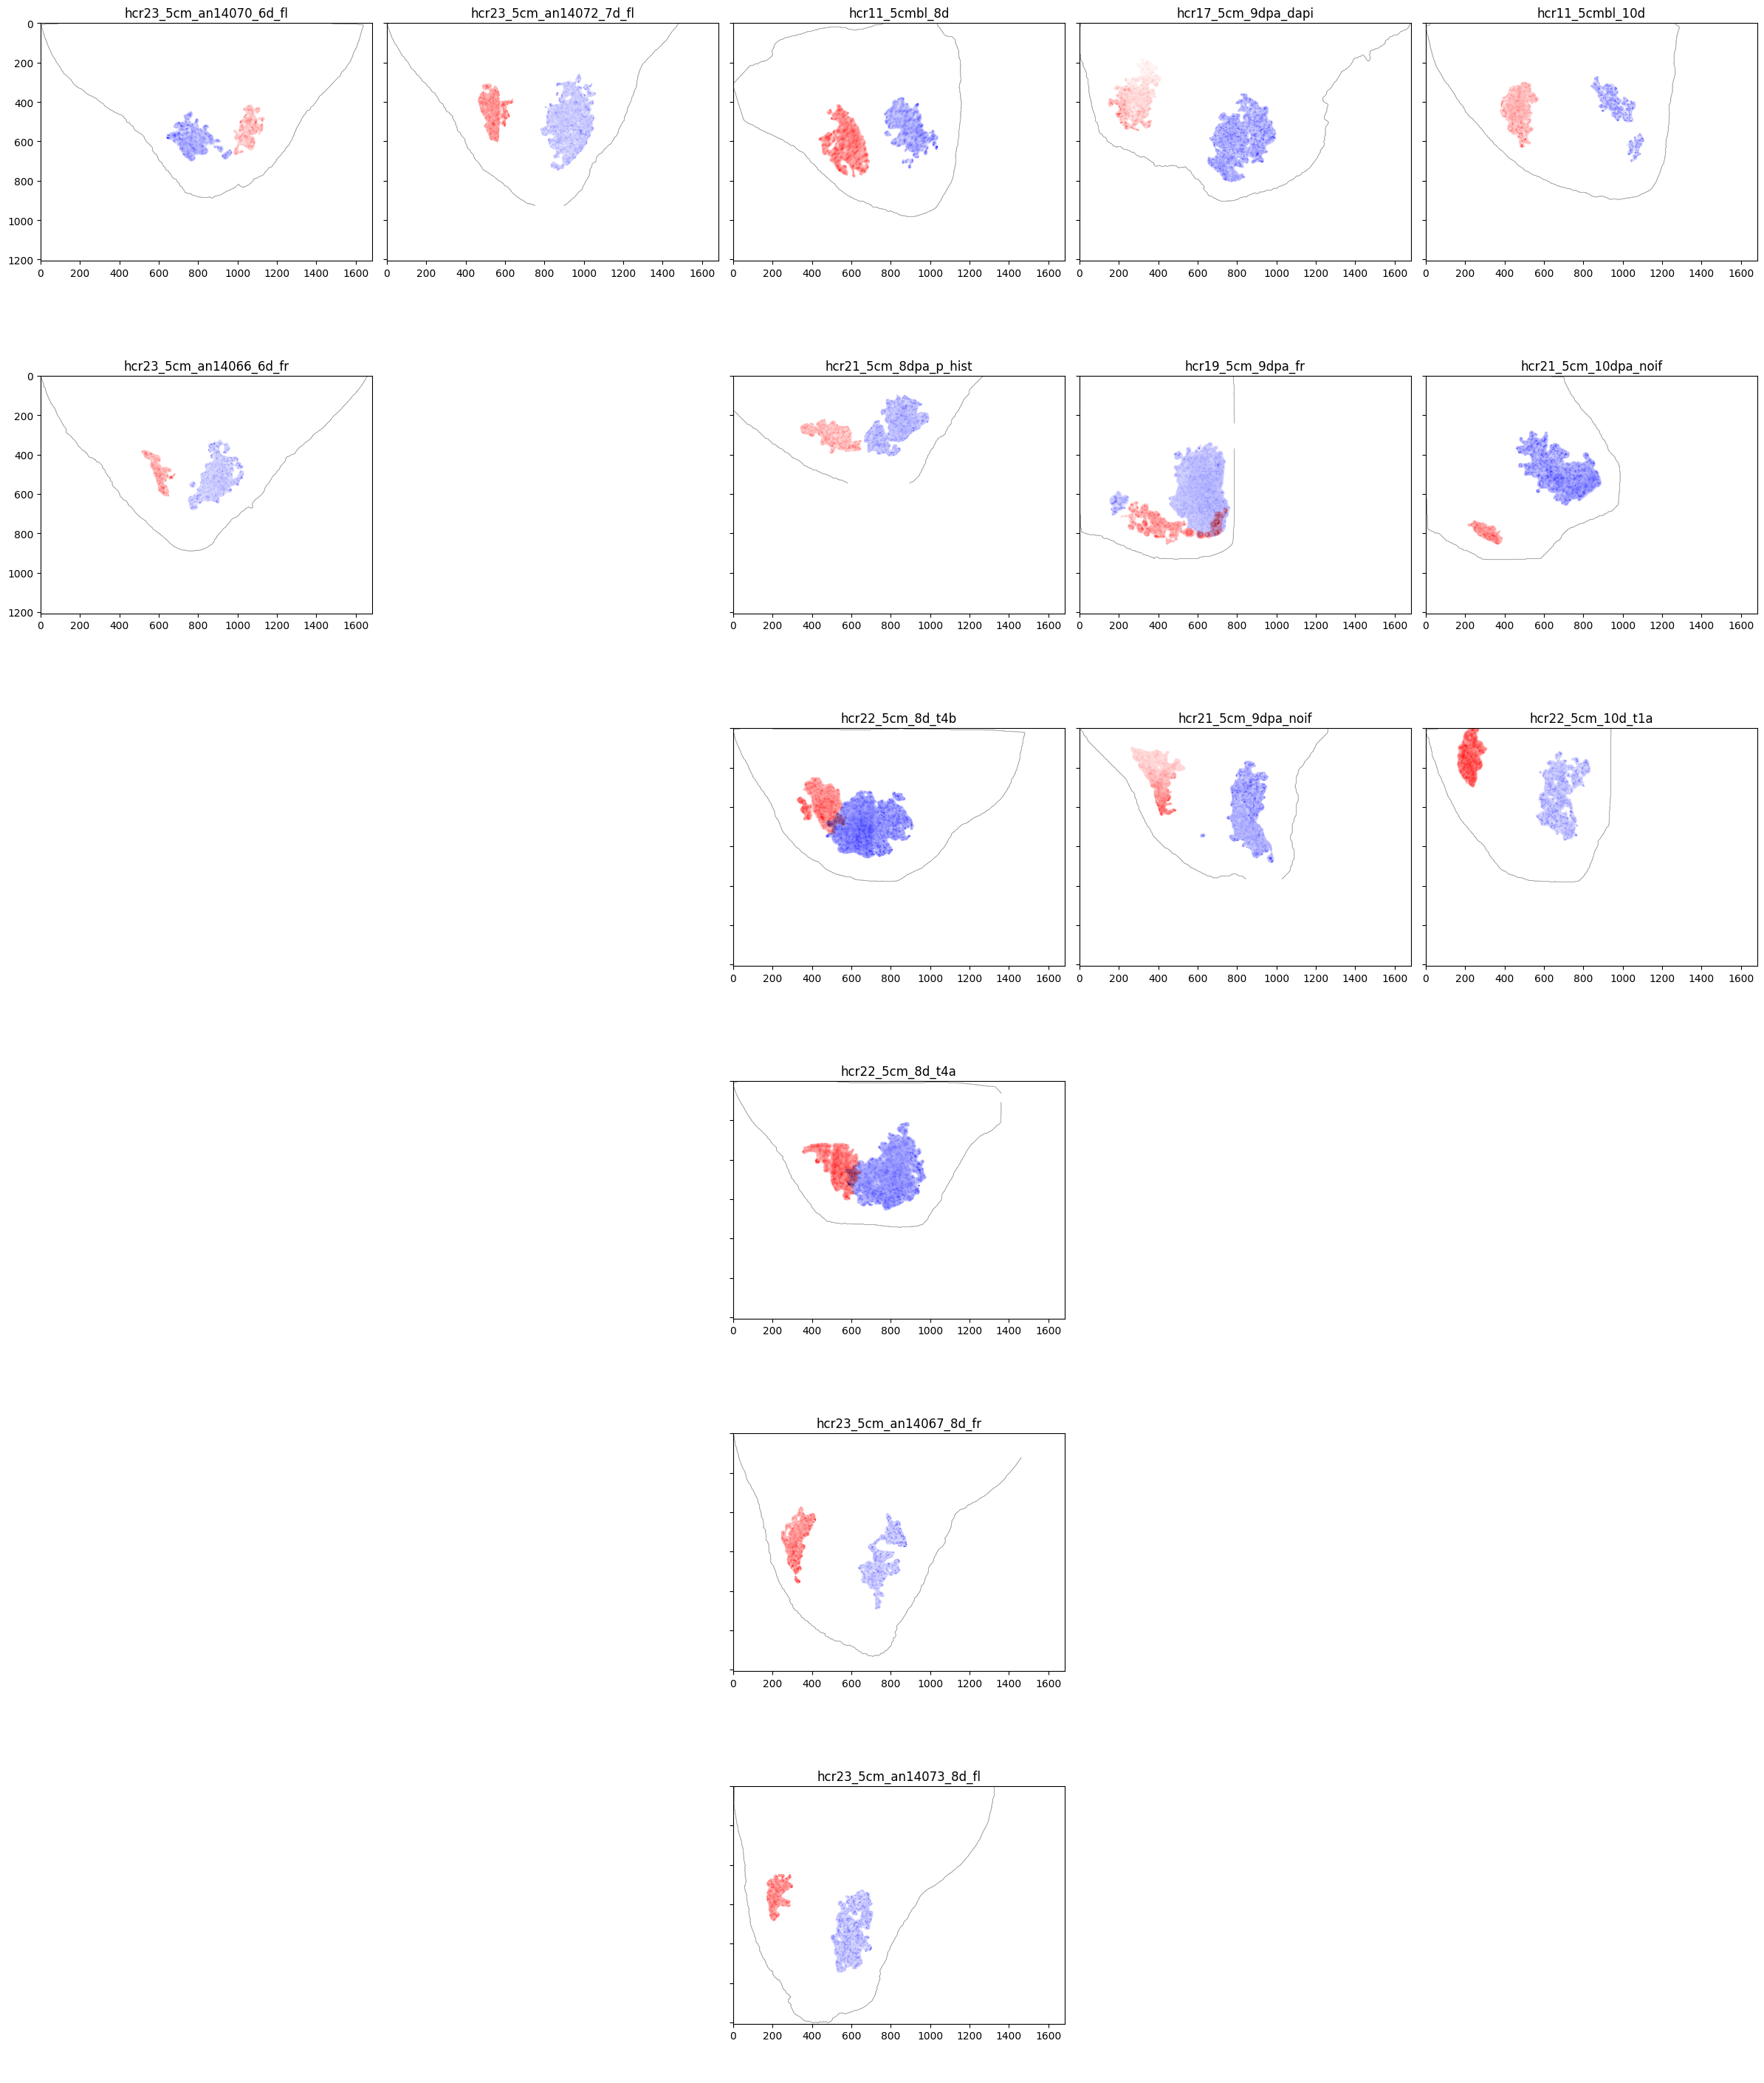

In [22]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('preview/5cm_blastemas_left_for_final_fits.pdf')
plt.show()

## 7 cm blastemas

In [23]:
df_to_plot = df[df['animal_size'] == 7]

In [24]:
len(df_to_plot)

8

In [25]:
keys_dpa = set( [str(h) for h in df_to_plot['time'].values] )
keys_dpa

{'10', '12', '8', '9'}

In [26]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['time'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['pretreated_file_name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            if 'shh50_clip' in key:
                img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )
            elif ('fgf50_clip' in key) or ('dusp50_clip' in key):
                img_morph[key] = img_morph[key] * mask.few_largest_components( img_morph[key] > 0, 2 )
            

        # total projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:196: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:198: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


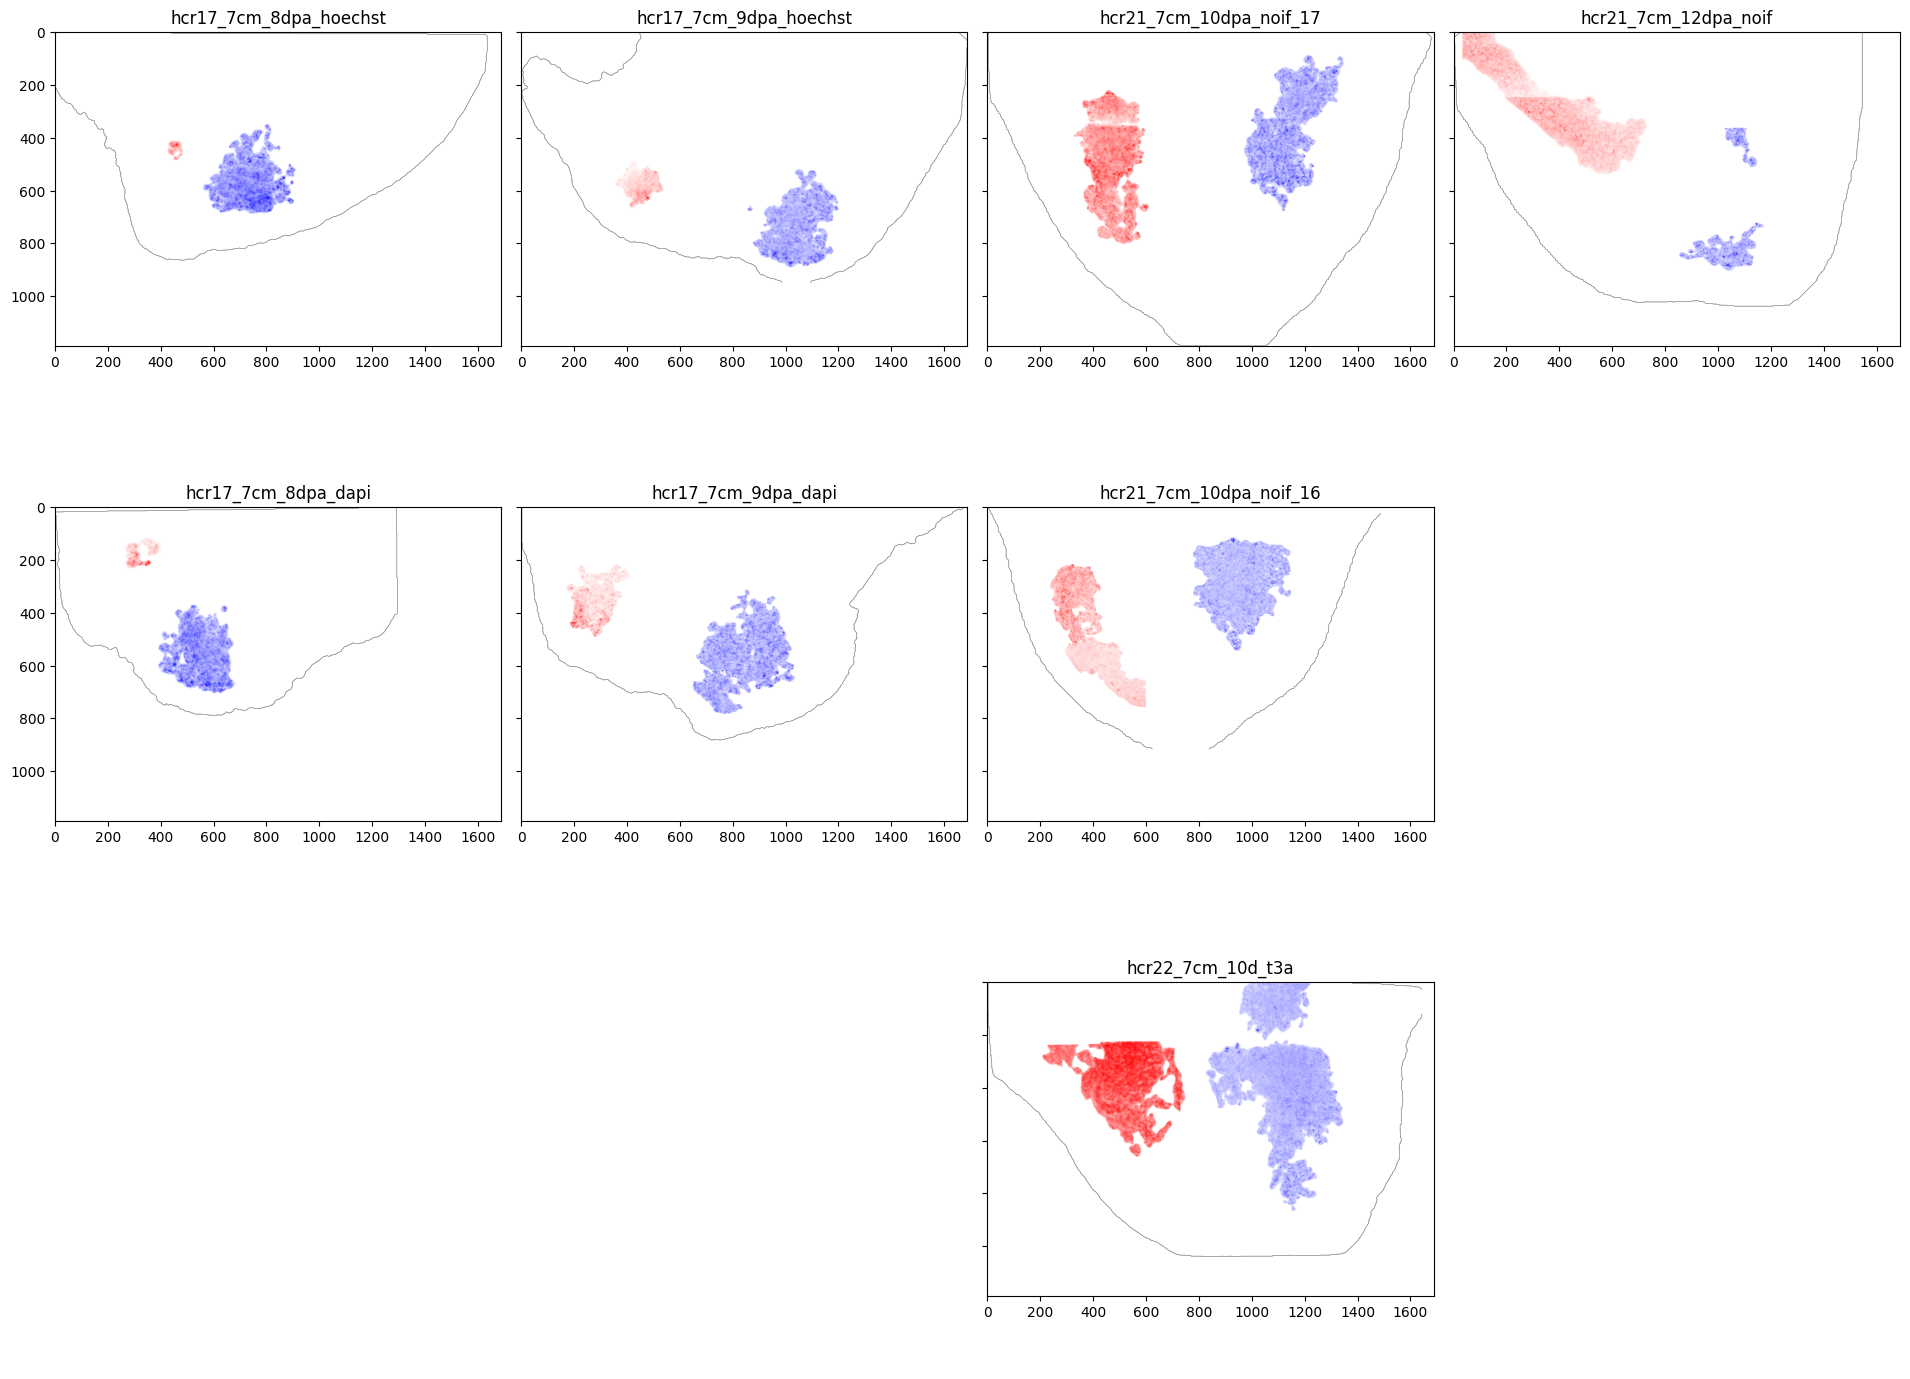

In [27]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('preview/7cm_blastemas_left_for_final_fits.pdf')
plt.show()